Hell!. In this project, I'm going to analyze IPL Data to find out the most valuable players for fantasy cricket competitions. For this, I have used the points system as used by some of the popular fantasy platforms.

Note: The points calculated aren't exactly correct as I have not included points from Run Outs, and Economy+Strike Rates for particular innings, as that would require innings-by-innings data. The latter part is negligible anyways and the run-out points would create at most a difference of 1-2 points per match for good fielders. All major criterias have been taken into account so overall you can consider this a pretty accurate analysis.

Let's Begin by doing the necessary imports:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

Our first step is to collect the data. I have gathered the data from ESPN Cricinfo's pages for aggregated batting and bowling stats of players of different teams. First, the batting stats:

In [29]:
cskbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4343;type=trophy')[0]
dcbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4347;type=trophy')[0]
ddbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4344;type=trophy')[0]
glbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=5845;type=trophy')[0]
kxipbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4342;type=trophy')[0]
ktkbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4788;type=trophy')[0]
kkrbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4341;type=trophy')[0]
mibat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4346;type=trophy')[0]
pwibat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4787;type=trophy')[0]
rrbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4345;type=trophy')[0]
rpsbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=5843;type=trophy')[0]
rcbbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=4340;type=trophy')[0]
srhbat=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/batting.html?id=117;team=5143;type=trophy')[0]

Similarly, the bowling stats:

In [30]:
cskbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4343;type=trophy')[0]
dcbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4347;type=trophy')[0]
ddbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4344;type=trophy')[0]
glbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=5845;type=trophy')[0]
kxipbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4342;type=trophy')[0]
ktkbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4788;type=trophy')[0]
kkrbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4341;type=trophy')[0]
mibowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4346;type=trophy')[0]
pwibowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4787;type=trophy')[0]
rrbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4345;type=trophy')[0]
rpsbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=5843;type=trophy')[0]
rcbbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=4340;type=trophy')[0]
srhbowl=pd.read_html('https://stats.espncricinfo.com/ci/engine/records/averages/bowling.html?id=117;team=5143;type=trophy')[0]

Here's an example of what the raw data looks like:

In [31]:
cskbowl

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St
0,P Amarnath,2008-2008,6,6,22.0,0,236,7,2/29,33.71,10.72,18.8,0,0,2,0
1,S Anirudha,2008-2013,19,-,-,-,-,-,-,-,-,-,-,-,11,0
2,KB Arun Karthik,2010-2010,1,-,-,-,-,-,-,-,-,-,-,-,0,0
3,R Ashwin,2009-2015,97,94,337.4,4,2180,90,3/16,24.22,6.45,22.5,0,0,20,0
4,KM Asif,2018-2018,2,2,6.0,0,75,3,2/43,25.00,12.50,12.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,S Vidyut,2008-2008,9,1,2.0,0,22,1,1/22,22.00,11.00,12.0,0,0,1,0
76,M Vijay,2009-2020,70,-,-,-,-,-,-,-,-,-,-,-,33,0
77,SR Watson,2018-2020,43,11,28.0,0,251,6,2/29,41.83,8.96,28.0,0,0,11,0
78,DJ Willey,2018-2018,3,3,10.0,0,95,2,1/24,47.50,9.50,30.0,0,0,2,0


Now that we have our team-wise data separated, lets combine it together into 2 separate dataframes for batting and bowling stats:  dfbat and dfbowl

In [32]:
dfbat=pd.concat([cskbat,dcbat,ddbat,glbat,kxipbat,ktkbat,kkrbat,mibat,pwibat,rrbat,rpsbat,rcbbat,srhbat])
dfbowl=pd.concat([cskbowl,dcbowl,ddbowl,glbowl,kxipbowl,ktkbowl,kkrbowl,mibowl,pwibowl,rrbowl,rpsbowl,rcbbowl,srhbowl])

Now we need to clean the data to obtain it in the desired form: This includes Replacing null values with 0, dropping a few columns from both dataframes and converting string to float values.

In [33]:
dfbat=dfbat.replace('-',0)
dfbowl=dfbowl.replace('-',0)
dfbat=dfbat.drop(['Span','HS','Ave','SR'],axis=1)
dfbowl=dfbowl.drop(['Span','BBI','Ave','Econ','SR'],axis=1)
dfbat=dfbat.apply(pd.to_numeric,errors='ignore')
dfbowl=dfbowl.apply(pd.to_numeric,errors='ignore')

Once we have our combined data, we group it by player. This is necessary as many players have represented multiple franchises in their career, hence there are multiple rows of data for them, which needs to be grouped together as a single row. Then, we create columns like Strike Rate(SR),Average(Ave) based off our understanding of cricket and sort the dataframe.

In [34]:
dfbat=dfbat.groupby('Player').sum()
dfbat['SR']=round(dfbat['Runs']*100/dfbat['BF'],2)
dfbat['Ave']=round(dfbat['Runs']/(dfbat['Inns']-dfbat['NO']),2)
dfbat=dfbat.sort_values(by='Runs',ascending=False)

We do a similar process for the bowling dataframe.

In [35]:
dfbowl=dfbowl.groupby('Player').sum()
dfbowl['Bowl Ave']=round(dfbowl['Runs']/dfbowl['Wkts'],2)
dfbowl['Econ']=round(dfbowl['Runs']/dfbowl['Overs'],2)
dfbowl['Bowl SR']=round(dfbowl['Overs']*6/dfbowl['Wkts'],2)
dfbowl=dfbowl.sort_values(by='Wkts',ascending=False)

This is what our combined batting dataframe looks like:

In [36]:
dfbat

,Mat,Inns,NO,Runs,BF,100,50,0,4s,6s,SR,Ave
Player,,,,,,,,,,,,
V Kohli,192,184,30,5878,4496,5,39,6,503,201,130.74,38.17
SK Raina,193,189,28,5368,3915,1,38,8,493,194,137.11,33.34
DA Warner,142,142,19,5254,3712,4,48,7,510,195,141.54,42.72
RG Sharma,200,195,28,5230,4004,1,39,13,458,213,130.62,31.32
S Dhawan,176,175,24,5197,4096,2,41,10,591,108,126.88,34.42
...,...,...,...,...,...,...,...,...,...,...,...,...
Anand Rajan,8,0,0,0,0,0,0,0,0,0,NaN,NaN
Abdur Razzak,1,1,1,0,2,0,0,0,0,0,0.00,NaN
T Shamsi,4,0,0,0,0,0,0,0,0,0,NaN,NaN


The next step is to apply the points criteria to calculate different types of points earned during a match. This is classified into new columns in our dataframe based on Dream11 points system, eg, 1 point for each run, 2 bonus points for each six etc.

In [10]:
dfbat['Runs Points']=dfbat['Runs']
dfbat['Boundary Bonus']=dfbat['4s']
dfbat['Six Bonus']=2*dfbat['6s']
dfbat['Half Century Bonus']=8*dfbat['50']
dfbat['Century Bonus']=16*dfbat['100']
dfbat['Dismissal For A Duck']=-2*dfbat['0']

Similarly we apply the criteria to the bowling dataframe, which contains columns for both bowling and fielding stats,eg, 25 points for each wicket, 8 points for each catch etc.

In [11]:
dfbowl['Wickets Points']=25*dfbowl['Wkts']
dfbowl['4 Wicket Haul Bonus']=8*dfbowl['4']
dfbowl['5 Wicket Haul Bonus']=16*dfbowl['5']
dfbowl['Maiden Over Bonus']=8*dfbowl['Mdns']
dfbowl['Catch Points']=8*dfbowl['Ct']
dfbowl['Stumping Points']=12*dfbowl['St']

The next step is to combine both our batting and bowling dataframes into one master dataframe and add another criteria: 4 points for being in Starting 11. On combining, we then drop all columns not required for the analysis and retain only the points and matches columns

In [12]:
dfbat=dfbat.reset_index()
dfbowl=dfbowl.reset_index()
dfbowl_tojoin=dfbowl.drop(['Mat','Inns','Runs'],axis=1)
df=pd.merge(dfbat,dfbowl_tojoin,on='Player')
df['Starting 11 Points']=4*df['Mat']
dfpoints=df.drop(['Inns','NO','Runs','BF','100','50','0','4s','6s','SR','Ave',
                  'Overs','Mdns','Wkts','4','5','Ct','St','Bowl Ave','Econ','Bowl SR'],axis=1)

Now we add all the different points in different categories as Total Points and find the most important metric for the analysis, Total Points Per Match (stored as Total PPM)

In [13]:
dfpoints['Total Points']=dfpoints.drop('Mat',axis=1).sum(axis=1)
dfpoints['Total PPM']=(dfpoints['Total Points']/dfpoints['Mat']).round(2)

Now I apply a criteria to show only those players who have played a minimum of 30 matches. This roughly corresponds to the length of 2 full seasons, which is a good enough sample size to judge players' performances. The final dataframe is stored as dfbest.

In [14]:
dffilter=dfpoints[dfpoints['Mat']>=1]
dfbest=dffilter.sort_values(by='Total PPM',ascending=False)
dfbest=dfbest.set_index('Player')

Finally, we have our results. The Fantasy points earned per match by 171 players, the most valuable 25 of which are shown below:

In [15]:
dfbest

,Mat,Runs Points,Boundary Bonus,Six Bonus,Half Century Bonus,Century Bonus,Dismissal For A Duck,Wickets Points,4 Wicket Haul Bonus,5 Wicket Haul Bonus,Maiden Over Bonus,Catch Points,Stumping Points,Starting 11 Points,Total Points,Total PPM
Player,,,,,,,,,,,,,,,,
DAJ Bracewell,1,12,1,0,0,0,0,75,0,0,0,8,0,4,100,100.00
AS Joseph,3,15,2,0,0,0,0,150,0,16,8,8,0,12,211,70.33
Umar Gul,6,39,1,10,0,0,0,300,8,0,8,0,0,24,390,65.00
AP Dole,3,34,3,2,0,0,0,125,0,0,0,16,0,12,192,64.00
D du Preez,2,10,0,0,0,0,0,100,0,0,8,0,0,8,126,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CJ Green,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
C Ganapathy,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
AJ Turner,4,3,0,0,0,0,-6,0,0,0,0,0,0,16,13,3.25


Wow! Some of the usual suspects but few unexpected names right up there too. 

INSIGHTS: 1)All rounders like Watson and Russell leading the charts, with Kallis(considered more of a test match spec) a               surprise entry in the top 5.

2) Popular captaincy choices in fantasy leagues like Kohli, De Villiers surprisingly fetch relatively lower points,             and players like Rohit,Dhoni,Malinga and Narine don't even make it to the top 25!

Now that we're at it, let's also take a quick look at the 10 least valuable players. Unsurprisingly, most of them are no longer getting picked and have had short careers

In [16]:
dfbest.tail(10).sort_values('Total PPM')

,Mat,Runs Points,Boundary Bonus,Six Bonus,Half Century Bonus,Century Bonus,Dismissal For A Duck,Wickets Points,4 Wicket Haul Bonus,5 Wicket Haul Bonus,Maiden Over Bonus,Catch Points,Stumping Points,Starting 11 Points,Total Points,Total PPM
Player,,,,,,,,,,,,,,,,
JL Denly,1,0,0,0,0,0,-2,0,0,0,0,0,0,4,2,2.00
Sunny Gupta,1,0,0,0,0,0,-2,0,0,0,0,0,0,4,2,2.00
AJ Turner,4,3,0,0,0,0,-6,0,0,0,0,0,0,16,13,3.25
RW Price,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
MB Parmar,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
Tejas Baroka,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
RA Shaikh,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
RR Bose,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00
CJ Green,1,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4.00


Let's visualize the distribution of the Total Points per match data:

Mean is 29.043533447684407, Standard Deviation is 12.514021944413146


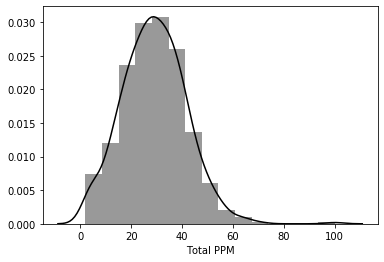

In [17]:
sns.distplot(dfbest['Total PPM'],color='black',bins=15)
print('Mean is {}, Standard Deviation is {}'.format(dfbest['Total PPM'].mean(), dfbest['Total PPM'].std()))

The distribution shows points ranging from about 16 to 57 with most of the players having points between the 30-40 range

Now let's dive a bit deeper into our analysis and classify the total points per match into Batting, Bowling and Fielding points per match (Stored as Batting PPM, Bowling PPM and Fielding PPM respectively): 

In [18]:
dfbest['Batting PPM']=(dfbest[['Runs Points','Boundary Bonus','Six Bonus','Half Century Bonus',
                                            'Century Bonus','Dismissal For A Duck']].sum(axis=1)/dfbest['Mat']).round(2)
dfbest['Bowling PPM']=(dfbest[['Wickets Points','4 Wicket Haul Bonus','5 Wicket Haul Bonus',
                                            'Maiden Over Bonus']].sum(axis=1)/dfbest['Mat']).round(2)
dfbest['Fielding PPM']=(dfbest[['Catch Points','Stumping Points']].sum(axis=1)/dfbest['Mat']).round(2)

Lets look at the top players by batting, bowling and fielding points per match:

In [19]:
dfbest['Batting PPM'].sort_values(ascending=False).head(10)

Player
LMP Simmons    47.45
CH Gayle       46.84
JM Bairstow    46.81
DA Warner      46.39
HM Amla        45.69
SE Marsh       43.28
ML Hayden      43.06
RD Gaikwad     42.00
MEK Hussey     40.90
KL Rahul       40.58
Name: Batting PPM, dtype: float64

In [20]:
dfbest['Bowling PPM'].sort_values(ascending=False).head(10)

Player
DAJ Bracewell    75.00
AS Joseph        58.00
D du Preez       54.00
Umar Gul         52.67
Sohail Tanvir    52.18
L Ngidi          47.64
CK Langeveldt    46.43
K Rabada         44.71
Shoaib Akhtar    44.33
CRD Fernando     43.30
Name: Bowling PPM, dtype: float64

In [21]:
dfbest['Fielding PPM'].sort_values(ascending=False).head(10)

Player
Mohammad Ashraful    16.00
Kamran Akmal         14.67
KH Devdhar           12.00
B Geeves             12.00
MN van Wyk           11.20
N Saini              11.20
A Flintoff           10.67
H Klaasen            10.29
YV Takawale           9.50
M Rawat               8.44
Name: Fielding PPM, dtype: float64

With the data classified into the respective sections, its time to visualize the points distribution for the top,say,35 players

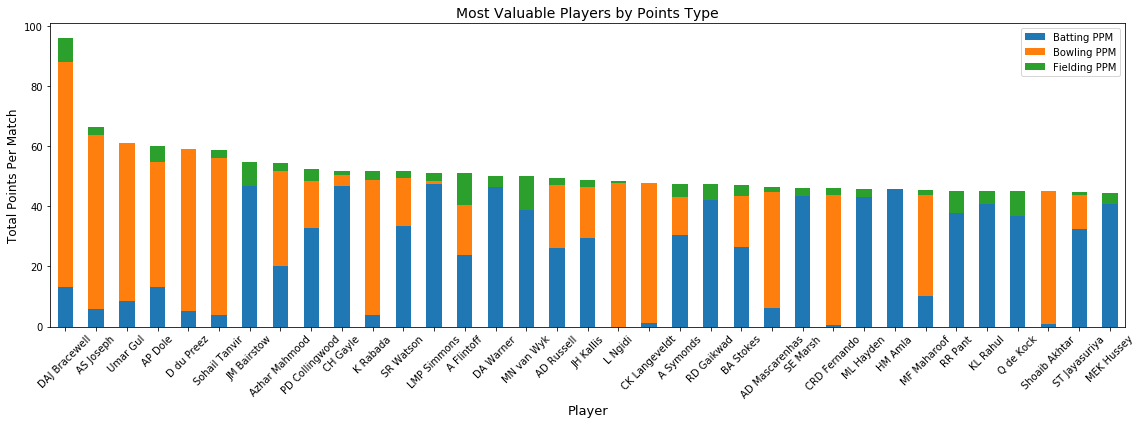

In [22]:
df1=dfbest[['Batting PPM','Bowling PPM','Fielding PPM']].iloc[0:35]
df1.plot.bar(stacked=True,figsize=(16,6))
plt.xticks(rotation=45)
plt.ylabel('Total Points Per Match',fontsize=12)
plt.xlabel('Player',fontsize=13)
plt.title('Most Valuable Players by Points Type',fontsize=14)
plt.tight_layout()

INSIGHTS: 1) The chart shows that its the batsmen that dominate the most at the top. We only see few proper bowlers in the top 30 and then only from positions 30-35 do we see some proper bowlers getting in.

2) Warner actually surpasses Gayle as an opening batsman (and as a fielder) but Gayle pips him on overall points based on the few(18) wickets he's taken as a part timer.

3) For players like Pant, De Kock and Gilchrist, Fielding points constitute a decent amount of total points, which is because as keepers, they get more catches and stumping oppurtunities.

4) Krunal Pandya and Stokes are two such all-rounders, who earn almost identical points in both the batting and bowling categories.

Lets take a look at the best All Rounders by plotting Total Bowling Points vs Total Batting Points per match. I've defined an All Rounder to be someone who fetches atleast 10 points per match in both disciplines. 22 players fit this definition, which are shown below:

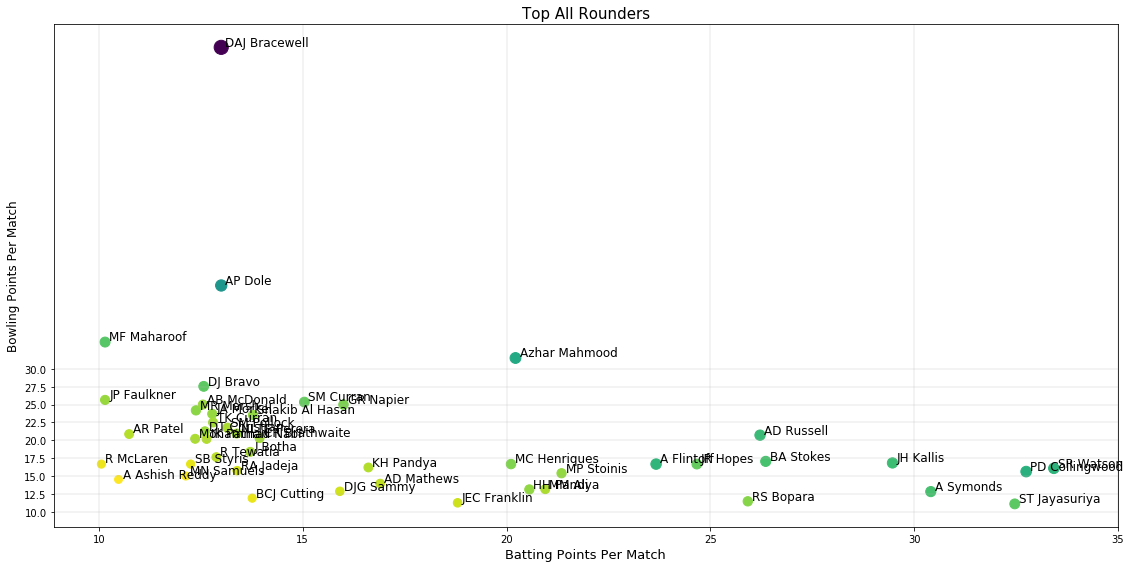

In [23]:
dfallround=dfbest[(dfbest['Batting PPM']>10)&(dfbest['Bowling PPM']>10)]

plt.figure(figsize=(16,8))
plt.scatter(x='Batting PPM',y='Bowling PPM',data=dfallround,c='Total PPM',cmap='viridis_r',s=dfallround['Total PPM']*2)
plt.title('Top All Rounders',fontsize=15)
plt.xlabel('Batting Points Per Match',fontsize=13)
plt.ylabel('Bowling Points Per Match',fontsize=12)
x=np.arange(10,40,5)
y=np.arange(10,32.5,2.5)
plt.xticks(ticks=x,labels=x)
plt.yticks(ticks=y,labels=y)
plt.grid(lw=0.3)
for index, row in dfallround.reset_index().iterrows():
    plt.annotate(row['Player'], xy = (row['Batting PPM'], row['Bowling PPM']),
                 xytext = (row['Batting PPM']+0.1, row['Bowling PPM']+0.2), fontsize=12)
plt.tight_layout()

INSIGHTS: This graph clearly distinguishes bowling all rounders(upper left) from batting ones(lower right) with proper all rounders lying close to the y=x diagonal line (batting points almost same as bowling points)

For the final visualization, we're going to plot all 171 players from the dfbest dataframe and look for the players who have performed most consistently over a long career. For this, I've set a criteria of at least 100 career matches while maintaining at least 45 Total Points Per Match:

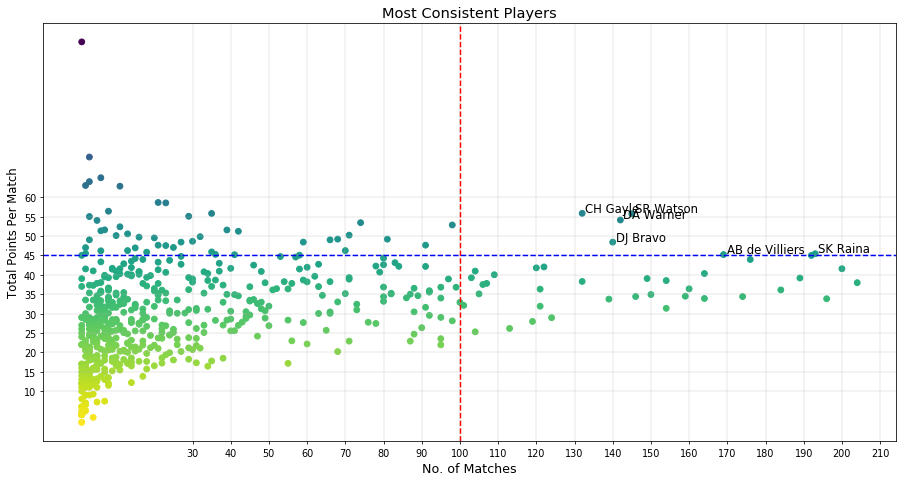

In [24]:
dffilter2=dfbest[(dfbest['Mat']>=100)&(dfbest['Total PPM']>=45)]

plt.figure(figsize=(13,7),dpi=70)
plt.scatter(x='Mat',y='Total PPM',data=dfbest,c='Total PPM',cmap='viridis_r')
plt.title('Most Consistent Players',fontsize=15)
plt.xlabel('No. of Matches',fontsize=13)
plt.ylabel('Total Points Per Match',fontsize=12)
x=np.arange(30,220,10)
y=np.arange(10,65,5)
plt.xticks(ticks=x,labels=x)
plt.yticks(ticks=y,labels=y)
plt.grid(lw=0.3)
plt.axvline(x=100, color='r',ls='--',lw=1.5)
plt.axhline(y=45, color='b',ls='--',lw=1.5)
for index, row in dffilter2.reset_index().iterrows():
    plt.annotate(row['Player'], xy = (row['Mat'], row['Total PPM']),
                 xytext = (row['Mat']+0.8, row['Total PPM']+0.4), fontsize=12)
plt.tight_layout()

INSIGHTS: 1) Watson, Gayle, Warner, Bravo, Kohli and Raina are the most overall consistent players.

2) Raina, despite having played the most matches(193), has maintained Total Points Per Match>45. The graph above shows his impact and longevity together. No wonder he is referred to as "Mr. IPL"

3) Kallis and De Villiers miss out narrowly (98 matches and 44.91 PPM respectively)

That's all for this analysis. I hope this was insightful and would help you make smarter, data driven decisions next time you select your fantasy teams. 

THANK YOU!

In [25]:
dfbest.reset_index(inplace=True)

In [26]:
dfbest[dfbest['Player'].str.contains("Kaul")]

,Player,Mat,Runs Points,Boundary Bonus,Six Bonus,Half Century Bonus,Century Bonus,Dismissal For A Duck,Wickets Points,4 Wicket Haul Bonus,5 Wicket Haul Bonus,Maiden Over Bonus,Catch Points,Stumping Points,Starting 11 Points,Total Points,Total PPM,Batting PPM,Bowling PPM,Fielding PPM
205,S Kaul,46,12,0,0,0,0,-4,1275,8,0,16,56,0,184,1547,33.63,0.17,28.24,1.22
557,U Kaul,5,0,0,0,0,0,0,0,0,0,0,16,0,20,36,7.20,0.00,0.00,3.20


In [51]:
dfbat[0:60]

,Mat,Inns,NO,Runs,BF,100,50,0,4s,6s,SR,Ave
Player,,,,,,,,,,,,
V Kohli,192,184,30,5878,4496,5,39,6,503,201,130.74,38.17
SK Raina,193,189,28,5368,3915,1,38,8,493,194,137.11,33.34
DA Warner,142,142,19,5254,3712,4,48,7,510,195,141.54,42.72
RG Sharma,200,195,28,5230,4004,1,39,13,458,213,130.62,31.32
S Dhawan,176,175,24,5197,4096,2,41,10,591,108,126.88,34.42
AB de Villiers,169,156,36,4849,3192,3,38,9,390,235,151.91,40.41
CH Gayle,132,131,15,4772,3179,6,31,7,383,349,150.11,41.14
MS Dhoni,204,182,69,4632,3387,0,23,3,313,216,136.76,40.99
RV Uthappa,189,182,17,4607,3544,0,24,7,454,163,129.99,27.92


In [50]:
dfbowl[0:60]

,Mat,Inns,Overs,Mdns,Runs,Wkts,4,5,Ct,St,Bowl Ave,Econ,Bowl SR
Player,,,,,,,,,,,,,
SL Malinga,122,122,471.1,8,3365,170,6,1,21,0,19.79,7.14,16.63
A Mishra,150,150,526.5,6,3867,160,3,1,21,0,24.17,7.34,19.74
PP Chawla,164,163,541.4,2,4263,156,2,0,40,0,27.33,7.87,20.82
DJ Bravo,140,137,451.5,2,3798,153,2,0,75,0,24.82,8.41,17.71
Harbhajan Singh,160,157,561.8,6,3967,150,1,1,48,0,26.45,7.06,22.47
R Ashwin,154,151,537.8,4,3700,138,1,0,34,0,26.81,6.88,23.38
B Kumar,121,121,449.3,8,3253,136,2,1,27,0,23.92,7.24,19.82
SP Narine,120,119,464.1,3,3147,127,6,1,19,0,24.78,6.78,21.93
YS Chahal,99,98,355.0,3,2723,121,2,0,20,0,22.50,7.67,17.60


In [49]:
dfbat.sort_values(by='50',ascending=False)[0:60]

,Mat,Inns,NO,Runs,BF,100,50,0,4s,6s,SR,Ave
Player,,,,,,,,,,,,
DA Warner,142,142,19,5254,3712,4,48,7,510,195,141.54,42.72
S Dhawan,176,175,24,5197,4096,2,41,10,591,108,126.88,34.42
V Kohli,192,184,30,5878,4496,5,39,6,503,201,130.74,38.17
RG Sharma,200,195,28,5230,4004,1,39,13,458,213,130.62,31.32
AB de Villiers,169,156,36,4849,3192,3,38,9,390,235,151.91,40.41
SK Raina,193,189,28,5368,3915,1,38,8,493,194,137.11,33.34
G Gambhir,154,152,16,4217,3404,0,36,12,492,59,123.88,31.01
CH Gayle,132,131,15,4772,3179,6,31,7,383,349,150.11,41.14
AM Rahane,149,140,16,3933,3240,2,28,13,416,76,121.39,31.72
